# Towards Tutorial 

In [1]:
# In 12 minutes: Stocks Analysis with Pandas and Scikit-Learn
# https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7

# Pandas Datareader
# https://pandas-datareader.readthedocs.io/en/latest/

In [2]:
import pandas as pd
import datetime
import pandas_datareader.data as web # pip install pandas_datareader
from pandas import Series, DataFrame

In [3]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017, 1, 11)

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-06,118.160004,116.470001,116.779999,117.910004,31751900.0,112.973305
2017-01-09,119.430000,117.940002,117.949997,118.989998,33561900.0,114.008080
2017-01-10,119.379997,118.300003,118.769997,119.110001,24462100.0,114.123047
2017-01-11,119.930000,118.599998,118.739998,119.750000,27588600.0,114.736275
2017-01-12,119.300003,118.209999,118.900002,119.250000,27086200.0,114.257195


## Rolling Mean (Moving Average) — to determine trend

In [4]:
'''
Rolling mean/Moving Average (MA) smooths out price data by creating a constantly updated average price. 
This is useful to cut down “noise” in our price chart. Furthermore, this Moving Average 
could act as “Resistance” meaning from the downtrend and uptrend of stocks you could expect it 
will follow the trend and less likely to deviate outside its resistance point.
'''

close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

In [5]:
mavg.tail(10)

Date
2016-12-29    106.925071
2016-12-30    106.997562
2017-01-03    107.080935
2017-01-04    107.163730
2017-01-05    107.249795
2017-01-06    107.335924
2017-01-09    107.433354
2017-01-10    107.533458
2017-01-11    107.641030
2017-01-12    107.741141
Name: Adj Close, dtype: float64

In [6]:
# This will calculate the Moving Average for the last 100 windows (100 days) of stocks closing price 
# and take the average for each of the window’s moving average. As you could see, 
# The Moving Average steadily rises over the window and does not follow the jagged 
# line of stocks price chart

In [7]:
# For better understanding, let’s plot it out with Matplotlib. We will overlay the Moving Average 
# with our Stocks Price Chart.

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

In [8]:
# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

'2.2.2'

In [9]:
# Adjusting the style of matplotlib
style.use('ggplot')

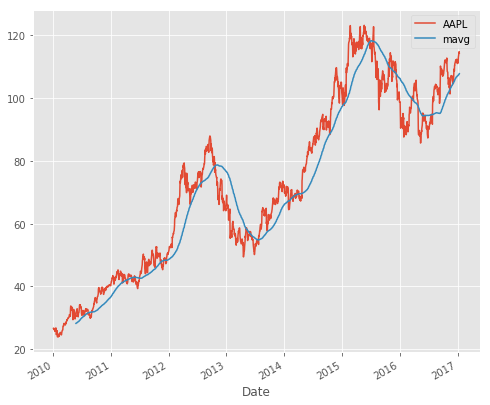

In [10]:
close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

In [11]:
# The Moving Average makes the line smooth and showcase the increasing or decreasing trend of stocks price.

# In this chart, the Moving Average showcases increasing trend the upturn or downturn of stocks price. 
# Logically, you should buy when the stocks are experiencing downturn and sell when the stocks 
# are experiencing upturn.

## Return Deviation — to determine risk and return

In [12]:
# Expected Return measures the mean, or expected value, of the probability 
# distribution of investment returns. The expected return of a portfolio is 
# calculated by multiplying the weight of each asset by its expected return 
# and adding the values for each investment — Investopedia.

# https://www.investopedia.com/terms/r/returnoninvestment.asp

In [13]:
# Formula:

# ROI = (Current Value of Investment - Cost of Investment) / Cost of Investment

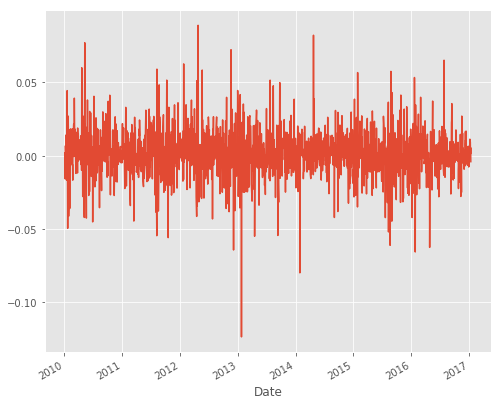

In [14]:
# Plotting the Return Rate
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [15]:
# Logically, our ideal stocks should return as high and stable as possible. 
# If you are risk averse(like me), you might want to avoid this stocks as 
# you saw the 10% drop in 2013. This decision is heavily subjected to your 
# general sentiment of the stocks and competitor analysis.

## Analysing your Competitors Stocks

In [16]:
# In this segment, we are going to analyse on how one company performs 
# in relative with its competitor. Let’s assume we are interested in 
# technology companies and want to compare the big guns: 
# Apple, GE, Google, IBM, and Microsoft.

In [17]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']

In [18]:
dfcomp.tail()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2017-01-06,112.973305,28.021051,806.150024,150.751312,59.743763
2017-01-09,114.008080,27.888081,806.650024,149.079559,59.553616
2017-01-10,114.123047,27.808300,804.789978,147.185501,59.534603
2017-01-11,114.736275,27.896944,807.909973,149.168472,60.076519
2017-01-12,114.257195,27.826027,806.359985,149.346359,59.525097


## Correlation Analysis — Does one competitor affect others?

In [19]:
# We can analyse the competition by running the percentage change 
# and correlation function in pandas. Percentage change will find 
# how much the price changes compared to the previous day which 
# defines returns. Knowing the correlation will help us see whether 
# the returns are affected by other stocks’ returns

In [20]:
retscomp = dfcomp.pct_change()
corr = retscomp.corr()

In [21]:
corr

Symbols,AAPL,GE,GOOG,IBM,MSFT
Symbols,,,,,
AAPL,1.000000,0.381475,0.411708,0.383816,0.393525
GE,0.381475,1.000000,0.422261,0.535149,0.474111
GOOG,0.411708,0.422261,1.000000,0.403004,0.472081
IBM,0.383816,0.535149,0.403004,1.000000,0.496582
MSFT,0.393525,0.474111,0.472081,0.496582,1.000000


Text(0,0.5,'Returns GE')

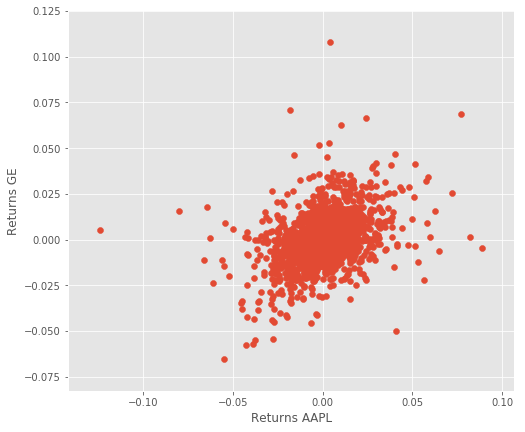

In [22]:
# Let’s plot Apple and GE with ScatterPlot to view their return distributions.

plt.scatter(retscomp.AAPL, retscomp.GE)
plt.xlabel('Returns AAPL')
plt.ylabel('Returns GE')

In [23]:
# We can see here that there are slight positive correlations among GE returns and Apple returns. 
# It seems like that the higher the Apple returns, the higher GE returns as well for most cases.

In [24]:
### Kernel Density Estimate (KDE)

In [25]:
# Let us further improve our analysis by plotting the scatter_matrix to visualize 
# possible correlations among competing stocks. At the diagonal point, we will 
# run Kernel Density Estimate (KDE). KDE is a fundamental data smoothing problem 
# where inferences about the population are made, based on a finite data sample. 
# It helps generate estimations of the overall distributions.

# https://en.wikipedia.org/wiki/Kernel_density_estimation?source=post_page-----a8d8a7b50ee7----------------------

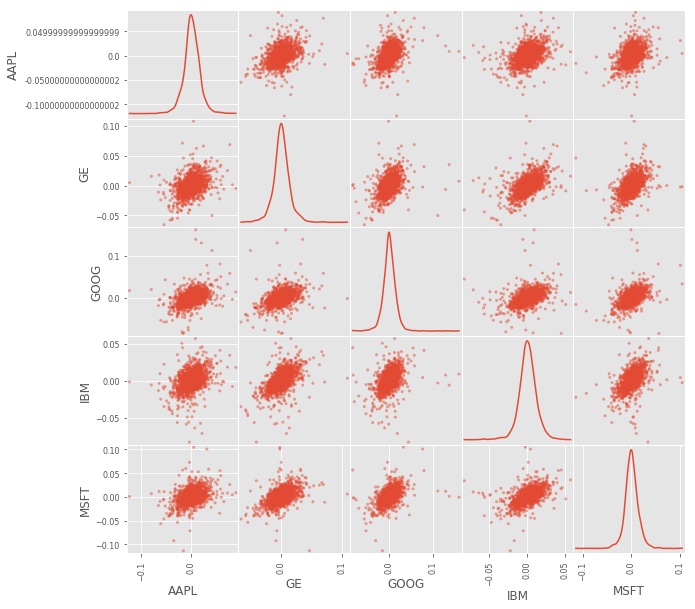

In [26]:
# KDE Plots and Scatter Matrix
# pd.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));
pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

In [27]:
# From here we could see most of the distributions among stocks which approximately positive correlations.

## Heat Maps

In [28]:
# To prove the positive correlations, we will use heat maps to visualize the correlation ranges 
# among the competing stocks. Notice that the lighter the color, the more correlated the two stocks are.

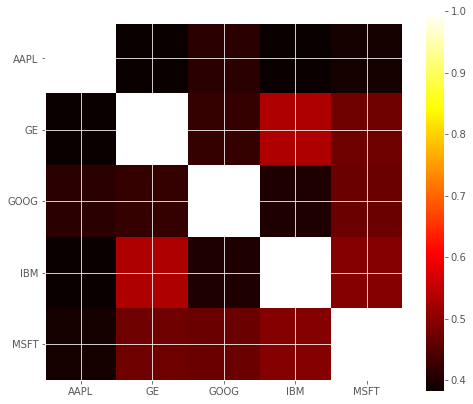

In [29]:
# Heatmap of Correlations among competing stocks
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

In [30]:
# From the Scatter Matrix and Heatmap, we can find great correlations among the competing stocks. 
# However, this might not show causality, and could just show the trend in the technology industry 
# rather than show how competing stocks affect each other.

## Stocks Returns Rate and Risk

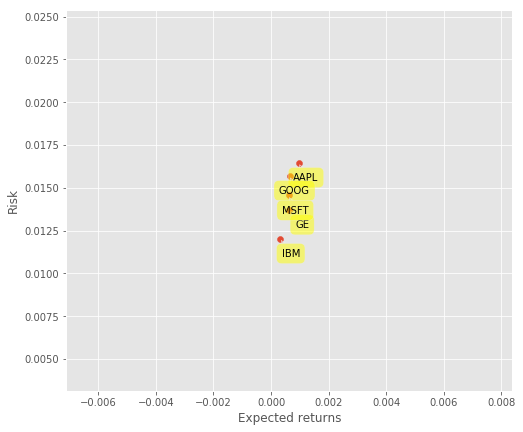

In [31]:
# Apart from correlation, we also analyse each stock’s risks and returns. 
# In this case we are extracting the average of returns (Return Rate) and 
# the standard deviation of returns (Risk).

# Quick Scatter Plot among Stocks Risk and Returns
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

## Predicting Stocks Price

In [32]:
# We will use these three machine learning models to predict our stocks: 
# Simple Linear Analysis, Quadratic Discriminant Analysis (QDA), and K Nearest Neighbor (KNN). 
# But first, let us engineer some features: High Low Percentage and Percentage Change.

dfreg = df.loc[:,["Adj Close","Volume"]]
dfreg["HL_PCT"] = (df["High"] - df["Low"]) / df["Close"] * 100.0
dfreg["PCT_change"] = (df["Close"] - df["Open"]) / df["Open"] * 100.0
dfreg.head()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2010-01-04,26.681330,123432400.0,0.990606,0.271752
2010-01-05,26.727465,150476200.0,1.091520,-0.102519
2010-01-06,26.302330,138040000.0,2.123523,-1.590633
2010-01-07,26.253704,119282800.0,1.400893,-0.552538
2010-01-08,26.428249,111902700.0,1.386924,0.798864


## Pre-processing & Cross Validation

In [33]:
# 1 - Drop missing value

# 2 - Separating the label here, we want to predict the AdjClose

# 3 - Scale the X so that everyone can have the same distribution for linear regression

# 4 - Finally We want to find Data Series of late X and early X (train) for model generation and evaluation

# 5 - Separate label and identify it as y

# 6 - Separation of training and testing of model by cross validation train test split

In [34]:
import math as math
import numpy as np
from sklearn import preprocessing

In [35]:
# Drop missing value
dfreg.fillna(value=-99999, inplace=True)

In [36]:
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

In [37]:
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

In [38]:
# Scale the X so that everyone can have the same distribution for linear regression
# X = preprocessing.StandardScaler()

# UserWarning: Numerical issues were encountered when centering the data and might not be solved. 
# Dataset may contain too large values. You may need to prescale your features.
X = preprocessing.scale(X) 

/home/rodrigo/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [39]:
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

In [40]:
# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

## Model Generation — Where the prediction fun starts

In [41]:
# use pip install sklearn
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# splitting the train and test sets
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# ISSUE HERE!!!
# from sklearn import preprocessing,cross_validation,neighbors,svm
# X_train, X_test, y_train, y_test= cross_validation.train_test_split(X,y,test_size=0.2)

# DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
#   "This module will be removed in 0.20.", DeprecationWarning)

## Simple Linear Analysis & Quadratic Discriminant Analysis

In [42]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

## K Nearest Neighbor (KNN)

In [43]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

## Evaluation

In [44]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

# results
print('The linear regression confidence is ', confidencereg)
print('The quadratic regression 2 confidence is ', confidencepoly2)
print('The quadratic regression 3 confidence is ', confidencepoly3)
print('The knn regression confidence is ', confidenceknn)

The linear regression confidence is  0.968372454019824
The quadratic regression 2 confidence is  0.9665933066084785
The quadratic regression 3 confidence is  0.8552609010888246
The knn regression confidence is  0.9398473390542657


## Forecast Functions

In [45]:
def getForecastSet(clf, df, X):
    df_aux = df.copy()
    f_set = clf.predict(X)
    df_aux['Forecast'] = np.nan
    return (f_set, df_aux)

In [46]:

def createForecast(df, f_set):
    df_aux = df.copy()
    last_date = df_aux.iloc[-1].name
    last_unix = last_date
    next_unix = last_unix + datetime.timedelta(days=1)

    for i in f_set:
        next_date = next_unix
        next_unix += datetime.timedelta(days=1)
        df_aux.loc[next_date] = [np.nan for _ in range(len(df_aux.columns) - 1)] + [i]
    
    return df_aux

In [47]:
def plotForecast(df, days):
    df['Adj Close'].tail(days).plot()
    df['Forecast'].tail(days).plot()
    plt.legend(loc=4)
    plt.xlabel('Date')
    plt.ylabel('Price')
    # plt.rc('figure', figsize=(10, 9))
    plt.show()

## Forecast Linear Regression

In [48]:
forecast_set, dfreg1 = getForecastSet(clfreg, dfreg, X_lately)
print(forecast_set, forecast_out)

[111.01670194 112.10903303 112.32766489 112.3182694  111.66081705
 112.06561153 112.78316542 112.52079068 112.22050664 111.45495002
 111.65614718 111.46807416 112.03626808 113.18559714 114.08343216
 114.30787693 114.856811   114.38431148] 18


In [49]:
dfreg1 = createForecast(dfreg1, forecast_set)

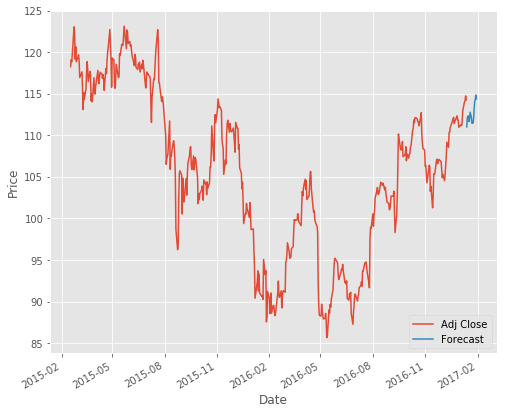

In [50]:
plotForecast(dfreg1, 500)

## Forecast Quadratic Regression

In [51]:
forecast_set, dfreg2 = getForecastSet(clfpoly2, dfreg, X_lately)
print(forecast_set, forecast_out)

[109.72612663 111.84778285 111.90241562 111.72022189 111.09327741
 112.15996351 112.7134146  112.43431767 112.04513813 111.07354994
 111.33884367 111.12419382 111.79583677 112.67790266 113.32159426
 113.64470671 114.18105119 113.60911663] 18


In [52]:
dfreg2 = createForecast(dfreg2, forecast_set)

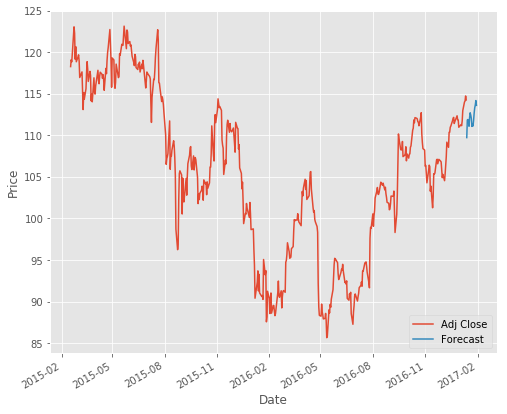

In [53]:
plotForecast(dfreg2, 500)

## Forecast Quadratic Regression 3

In [54]:
forecast_set, dfreg3 = getForecastSet(clfpoly3, dfreg, X_lately)
print(forecast_set, forecast_out)

[109.02410058 111.42744655 111.37172087 111.29422234 110.46521418
 112.13499672 112.21777659 111.18333031 111.61815588 110.11651877
 110.81973882 110.70230853 111.55733111 112.28522754 112.95984494
 112.87578102 113.67136642 112.87045839] 18


In [55]:
dfreg3 = createForecast(dfreg3, forecast_set)

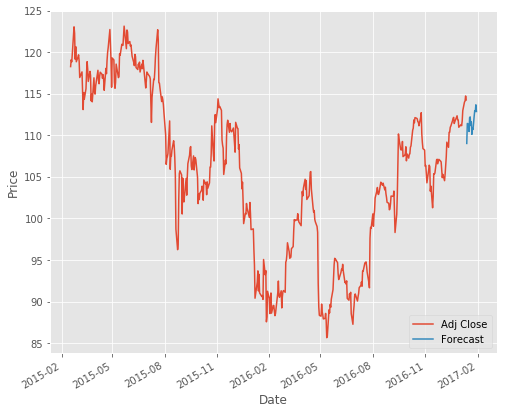

In [56]:
plotForecast(dfreg3, 500)

## Forecast KNN Regression

In [57]:
forecast_set, dfregKNN = getForecastSet(clfknn, dfreg, X_lately)
print(forecast_set, forecast_out)

[113.64748001 103.22626877 102.95124817 103.98313904 103.98313904
 112.92506027 112.76696777 102.93068314 107.21224976 102.93068314
 103.8321228  106.88648987 100.36526108 108.28883743 114.43230438
 102.95124817 112.71194077 102.95124817] 18


In [58]:
dfregKNN = createForecast(dfregKNN, forecast_set)

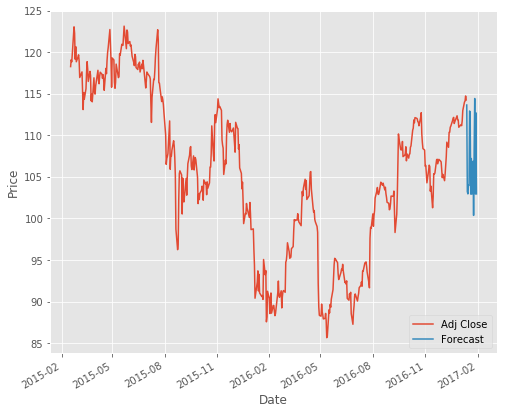

In [59]:
plotForecast(dfregKNN, 500)